In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import os
import sys
import random
import numpy as np
import cv2
import matplotlib.pyplot as plt

from tqdm import tqdm
from sklearn.model_selection import train_test_split

# TensorFlow and Keras imports
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

Training images shape: (536, 256, 256)
Training masks shape: (536, 256, 256, 1)
Validation images shape: (134, 256, 256)
Validation masks shape: (134, 256, 256, 1)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 256, 256,  │        640 │ input_layer[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 256, 256,  │     36,928 │ conv2d[0][0]      │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 128, 128,  │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 128, 128,  │     73,856 │ max_pooling2d[0]… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 128, 128,  │    147,584 │ conv2d_2[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 64, 64,    │          0 │ conv2d_3[0][0]    │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 64, 64,    │    295,168 │ max_pooling2d_1[… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 64, 64,    │    590,080 │ conv2d_4[0][0]    │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 32, 32,    │          0 │ conv2d_5[0][0]    │
│ (MaxPooling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 32, 32,    │  1,180,160 │ max_pooling2d_2[… │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 32, 32,    │  2,359,808 │ conv2d_6[0][0]    │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 16, 16,    │          0 │ conv2d_7[0][0]    │
│ (MaxPooling2D)      │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 16, 16,    │  4,719,616 │ max_pooling2d_3[… │
│                     │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 16, 16,    │  9,438,208 │ conv2d_8[0][0]    │
│                     │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose    │ (None, 32, 32,    │  2,097,664 │ conv2d_9[0][0]    │
│ (Conv2DTranspose)   │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 32, 32,    │          0 │ conv2d_transpose

 Total params: 31,030,593 (118.37 MB)

 Trainable params: 31,030,593 (118.37 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.8551 - accuracy_metric: 0.8551 - dice_coef: 0.2204 - iou_metric: 6.1578e-05 - loss: 0.6803 - precision_metric: 0.7632 - recall_metric: 6.4274e-05
Epoch 1: val_loss improved from inf to 0.61632, saving model to unet_dsb18.h5


17/17 ━━━━━━━━━━━━━━━━━━━━ 316s 13s/step - accuracy: 0.8552 - accuracy_metric: 0.8552 - dice_coef: 0.2203 - iou_metric: 5.9162e-05 - loss: 0.6797 - precision_metric: 0.7723 - recall_metric: 6.1752e-05 - val_accuracy: 0.8773 - val_accuracy_metric: 0.8813 - val_dice_coef: 0.1723 - val_iou_metric: 8.3038e-13 - val_loss: 0.6163 - val_precision_metric: 1.0000 - val_recall_metric: 8.3038e-13
Epoch 2/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8584 - accuracy_metric: 0.8584 - dice_coef: 0.1706 - iou_metric: 3.4681e-13 - loss: 0.5897 - precision_metric: 1.0000 - recall_metric: 3.4681e-13
Epoch 2: val_loss improved from 0.61632 to 0.54274, saving model to unet_dsb18.h5


17/17 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.8583 - accuracy_metric: 0.8583 - dice_coef: 0.1705 - iou_metric: 3.4673e-13 - loss: 0.5891 - precision_metric: 1.0000 - recall_metric: 3.4673e-13 - val_accuracy: 0.8773 - val_accuracy_metric: 0.8813 - val_dice_coef: 0.1561 - val_iou_metric: 8.3038e-13 - val_loss: 0.5427 - val_precision_metric: 1.0000 - val_recall_metric: 8.3038e-13
Epoch 3/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8551 - accuracy_metric: 0.8551 - dice_coef: 0.1722 - iou_metric: 3.3341e-13 - loss: 0.5154 - precision_metric: 1.0000 - recall_metric: 3.3341e-13
Epoch 3: val_loss improved from 0.54274 to 0.40164, saving model to unet_dsb18.h5


17/17 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.8552 - accuracy_metric: 0.8552 - dice_coef: 0.1711 - iou_metric: 3.3409e-13 - loss: 0.5138 - precision_metric: 1.0000 - recall_metric: 3.3409e-13 - val_accuracy: 0.8773 - val_accuracy_metric: 0.8813 - val_dice_coef: 0.1356 - val_iou_metric: 8.3038e-13 - val_loss: 0.4016 - val_precision_metric: 1.0000 - val_recall_metric: 8.3038e-13
Epoch 4/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8559 - accuracy_metric: 0.8559 - dice_coef: 0.1673 - iou_metric: 3.3621e-13 - loss: 0.4041 - precision_metric: 1.0000 - recall_metric: 3.3621e-13
Epoch 4: val_loss improved from 0.40164 to 0.31904, saving model to unet_dsb18.h5


17/17 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.8560 - accuracy_metric: 0.8559 - dice_coef: 0.1680 - iou_metric: 3.3689e-13 - loss: 0.4031 - precision_metric: 1.0000 - recall_metric: 3.3689e-13 - val_accuracy: 0.8773 - val_accuracy_metric: 0.8813 - val_dice_coef: 0.2057 - val_iou_metric: 8.3038e-13 - val_loss: 0.3190 - val_precision_metric: 1.0000 - val_recall_metric: 8.3038e-13
Epoch 5/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8558 - accuracy_metric: 0.8558 - dice_coef: 0.2331 - iou_metric: 3.3688e-13 - loss: 0.3391 - precision_metric: 1.0000 - recall_metric: 3.3688e-13
Epoch 5: val_loss improved from 0.31904 to 0.24975, saving model to unet_dsb18.h5


17/17 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 0.8558 - accuracy_metric: 0.8558 - dice_coef: 0.2343 - iou_metric: 3.3735e-13 - loss: 0.3381 - precision_metric: 1.0000 - recall_metric: 3.3735e-13 - val_accuracy: 0.8773 - val_accuracy_metric: 0.8813 - val_dice_coef: 0.2890 - val_iou_metric: 8.3038e-13 - val_loss: 0.2498 - val_precision_metric: 1.0000 - val_recall_metric: 8.3038e-13
Epoch 6/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8587 - accuracy_metric: 0.8587 - dice_coef: 0.3149 - iou_metric: 3.5014e-13 - loss: 0.2840 - precision_metric: 1.0000 - recall_metric: 3.5014e-13
Epoch 6: val_loss improved from 0.24975 to 0.21862, saving model to unet_dsb18.h5


17/17 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.8586 - accuracy_metric: 0.8586 - dice_coef: 0.3158 - iou_metric: 3.4986e-13 - loss: 0.2835 - precision_metric: 1.0000 - recall_metric: 3.4986e-13 - val_accuracy: 0.8773 - val_accuracy_metric: 0.8813 - val_dice_coef: 0.3550 - val_iou_metric: 8.3038e-13 - val_loss: 0.2186 - val_precision_metric: 1.0000 - val_recall_metric: 8.3038e-13
Epoch 7/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8561 - accuracy_metric: 0.8561 - dice_coef: 0.3883 - iou_metric: 0.0230 - loss: 0.2468 - precision_metric: 0.9893 - recall_metric: 0.0243
Epoch 7: val_loss improved from 0.21862 to 0.19881, saving model to unet_dsb18.h5


17/17 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 0.8569 - accuracy_metric: 0.8570 - dice_coef: 0.3897 - iou_metric: 0.0285 - loss: 0.2458 - precision_metric: 0.9874 - recall_metric: 0.0302 - val_accuracy: 0.9287 - val_accuracy_metric: 0.9283 - val_dice_coef: 0.4459 - val_iou_metric: 0.5165 - val_loss: 0.1988 - val_precision_metric: 0.7124 - val_recall_metric: 0.6561
Epoch 8/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9190 - accuracy_metric: 0.9191 - dice_coef: 0.4742 - iou_metric: 0.4774 - loss: 0.2100 - precision_metric: 0.8310 - recall_metric: 0.5432
Epoch 8: val_loss improved from 0.19881 to 0.16318, saving model to unet_dsb18.h5


17/17 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 0.9190 - accuracy_metric: 0.9190 - dice_coef: 0.4757 - iou_metric: 0.4778 - loss: 0.2096 - precision_metric: 0.8309 - recall_metric: 0.5441 - val_accuracy: 0.9329 - val_accuracy_metric: 0.9325 - val_dice_coef: 0.5492 - val_iou_metric: 0.4988 - val_loss: 0.1632 - val_precision_metric: 0.8020 - val_recall_metric: 0.5682
Epoch 9/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9274 - accuracy_metric: 0.9274 - dice_coef: 0.6280 - iou_metric: 0.5660 - loss: 0.1737 - precision_metric: 0.8344 - recall_metric: 0.6468
Epoch 9: val_loss improved from 0.16318 to 0.16242, saving model to unet_dsb18.h5


17/17 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.9274 - accuracy_metric: 0.9274 - dice_coef: 0.6275 - iou_metric: 0.5652 - loss: 0.1738 - precision_metric: 0.8347 - recall_metric: 0.6463 - val_accuracy: 0.9333 - val_accuracy_metric: 0.9327 - val_dice_coef: 0.5695 - val_iou_metric: 0.4739 - val_loss: 0.1624 - val_precision_metric: 0.8650 - val_recall_metric: 0.5165
Epoch 10/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9262 - accuracy_metric: 0.9262 - dice_coef: 0.6346 - iou_metric: 0.5634 - loss: 0.1817 - precision_metric: 0.8400 - recall_metric: 0.6389
Epoch 10: val_loss improved from 0.16242 to 0.12530, saving model to unet_dsb18.h5


17/17 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.9265 - accuracy_metric: 0.9264 - dice_coef: 0.6345 - iou_metric: 0.5641 - loss: 0.1809 - precision_metric: 0.8398 - recall_metric: 0.6400 - val_accuracy: 0.9516 - val_accuracy_metric: 0.9506 - val_dice_coef: 0.6457 - val_iou_metric: 0.6339 - val_loss: 0.1253 - val_precision_metric: 0.8270 - val_recall_metric: 0.7331
Epoch 11/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9399 - accuracy_metric: 0.9399 - dice_coef: 0.6828 - iou_metric: 0.6392 - loss: 0.1482 - precision_metric: 0.8352 - recall_metric: 0.7399
Epoch 11: val_loss improved from 0.12530 to 0.11866, saving model to unet_dsb18.h5


17/17 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.9400 - accuracy_metric: 0.9400 - dice_coef: 0.6833 - iou_metric: 0.6396 - loss: 0.1480 - precision_metric: 0.8350 - recall_metric: 0.7407 - val_accuracy: 0.9527 - val_accuracy_metric: 0.9515 - val_dice_coef: 0.6518 - val_iou_metric: 0.6216 - val_loss: 0.1187 - val_precision_metric: 0.8777 - val_recall_metric: 0.6864
Epoch 12/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9487 - accuracy_metric: 0.9487 - dice_coef: 0.7082 - iou_metric: 0.6873 - loss: 0.1273 - precision_metric: 0.8378 - recall_metric: 0.8019
Epoch 12: val_loss improved from 0.11866 to 0.11437, saving model to unet_dsb18.h5


17/17 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.9487 - accuracy_metric: 0.9486 - dice_coef: 0.7085 - iou_metric: 0.6874 - loss: 0.1275 - precision_metric: 0.8376 - recall_metric: 0.8023 - val_accuracy: 0.9547 - val_accuracy_metric: 0.9532 - val_dice_coef: 0.6807 - val_iou_metric: 0.6326 - val_loss: 0.1144 - val_precision_metric: 0.8886 - val_recall_metric: 0.6922
Epoch 13/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9510 - accuracy_metric: 0.9510 - dice_coef: 0.7379 - iou_metric: 0.7033 - loss: 0.1211 - precision_metric: 0.8482 - recall_metric: 0.8116
Epoch 13: val_loss improved from 0.11437 to 0.10615, saving model to unet_dsb18.h5


17/17 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.9510 - accuracy_metric: 0.9510 - dice_coef: 0.7379 - iou_metric: 0.7032 - loss: 0.1211 - precision_metric: 0.8475 - recall_metric: 0.8121 - val_accuracy: 0.9573 - val_accuracy_metric: 0.9563 - val_dice_coef: 0.7247 - val_iou_metric: 0.6883 - val_loss: 0.1062 - val_precision_metric: 0.8053 - val_recall_metric: 0.8299
Epoch 14/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9530 - accuracy_metric: 0.9530 - dice_coef: 0.7443 - iou_metric: 0.7203 - loss: 0.1183 - precision_metric: 0.8504 - recall_metric: 0.8248
Epoch 14: val_loss improved from 0.10615 to 0.09817, saving model to unet_dsb18.h5


17/17 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.9531 - accuracy_metric: 0.9531 - dice_coef: 0.7449 - iou_metric: 0.7207 - loss: 0.1180 - precision_metric: 0.8503 - recall_metric: 0.8255 - val_accuracy: 0.9597 - val_accuracy_metric: 0.9590 - val_dice_coef: 0.7434 - val_iou_metric: 0.7021 - val_loss: 0.0982 - val_precision_metric: 0.8277 - val_recall_metric: 0.8232
Epoch 15/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9540 - accuracy_metric: 0.9541 - dice_coef: 0.7622 - iou_metric: 0.7222 - loss: 0.1127 - precision_metric: 0.8474 - recall_metric: 0.8317
Epoch 15: val_loss improved from 0.09817 to 0.09654, saving model to unet_dsb18.h5


17/17 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.9542 - accuracy_metric: 0.9542 - dice_coef: 0.7626 - iou_metric: 0.7230 - loss: 0.1123 - precision_metric: 0.8478 - recall_metric: 0.8323 - val_accuracy: 0.9604 - val_accuracy_metric: 0.9600 - val_dice_coef: 0.7560 - val_iou_metric: 0.7193 - val_loss: 0.0965 - val_precision_metric: 0.8106 - val_recall_metric: 0.8662
Epoch 16/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9588 - accuracy_metric: 0.9588 - dice_coef: 0.7839 - iou_metric: 0.7453 - loss: 0.1023 - precision_metric: 0.8456 - recall_metric: 0.8642
Epoch 16: val_loss improved from 0.09654 to 0.09087, saving model to unet_dsb18.h5


17/17 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.9587 - accuracy_metric: 0.9587 - dice_coef: 0.7839 - iou_metric: 0.7453 - loss: 0.1024 - precision_metric: 0.8463 - recall_metric: 0.8637 - val_accuracy: 0.9631 - val_accuracy_metric: 0.9622 - val_dice_coef: 0.7534 - val_iou_metric: 0.7236 - val_loss: 0.0909 - val_precision_metric: 0.8374 - val_recall_metric: 0.8451
Epoch 17/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9606 - accuracy_metric: 0.9606 - dice_coef: 0.7820 - iou_metric: 0.7521 - loss: 0.0972 - precision_metric: 0.8518 - recall_metric: 0.8663
Epoch 17: val_loss improved from 0.09087 to 0.08746, saving model to unet_dsb18.h5


17/17 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.9605 - accuracy_metric: 0.9605 - dice_coef: 0.7822 - iou_metric: 0.7522 - loss: 0.0973 - precision_metric: 0.8522 - recall_metric: 0.8660 - val_accuracy: 0.9646 - val_accuracy_metric: 0.9632 - val_dice_coef: 0.7628 - val_iou_metric: 0.7144 - val_loss: 0.0875 - val_precision_metric: 0.8862 - val_recall_metric: 0.7905
Epoch 18/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9610 - accuracy_metric: 0.9610 - dice_coef: 0.7997 - iou_metric: 0.7613 - loss: 0.0979 - precision_metric: 0.8767 - recall_metric: 0.8562
Epoch 18: val_loss did not improve from 0.08746
17/17 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.9610 - accuracy_metric: 0.9609 - dice_coef: 0.7994 - iou_metric: 0.7609 - loss: 0.0980 - precision_metric: 0.8762 - recall_metric: 0.8561 - val_accuracy: 0.9638 - val_accuracy_metric: 0.9622 - val_dice_coef: 0.7635 - val_iou_metric: 0.7120 - val_loss: 0.0904 - val_precision_metric: 0.8631 - val_recall_metric: 0.8111
Epoch 19

17/17 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.9609 - accuracy_metric: 0.9609 - dice_coef: 0.7836 - iou_metric: 0.7532 - loss: 0.0971 - precision_metric: 0.8596 - recall_metric: 0.8602 - val_accuracy: 0.9648 - val_accuracy_metric: 0.9631 - val_dice_coef: 0.7673 - val_iou_metric: 0.7195 - val_loss: 0.0868 - val_precision_metric: 0.8605 - val_recall_metric: 0.8223
Epoch 20/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9624 - accuracy_metric: 0.9624 - dice_coef: 0.7910 - iou_metric: 0.7563 - loss: 0.0937 - precision_metric: 0.8709 - recall_metric: 0.8520
Epoch 20: val_loss improved from 0.08681 to 0.08281, saving model to unet_dsb18.h5


17/17 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.9624 - accuracy_metric: 0.9624 - dice_coef: 0.7915 - iou_metric: 0.7566 - loss: 0.0938 - precision_metric: 0.8708 - recall_metric: 0.8525 - val_accuracy: 0.9665 - val_accuracy_metric: 0.9650 - val_dice_coef: 0.7793 - val_iou_metric: 0.7277 - val_loss: 0.0828 - val_precision_metric: 0.8875 - val_recall_metric: 0.8057

--- Evaluating the Model ---
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 455ms/step - accuracy: 0.9663 - accuracy_metric: 0.9658 - dice_coef: 0.7920 - iou_metric: 0.7462 - loss: 0.0835 - precision_metric: 0.8738 - recall_metric: 0.8388
Validation Loss: 0.0828
Validation Accuracy: 0.9665
Validation IoU: 0.7277
Validation Dice Coefficient: 0.7793
Validation Precision: 0.8875
Validation Recall: 0.8057
Validation Overall Accuracy: 0.9650

--- Visualizing Predictions on Validation Set ---
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━

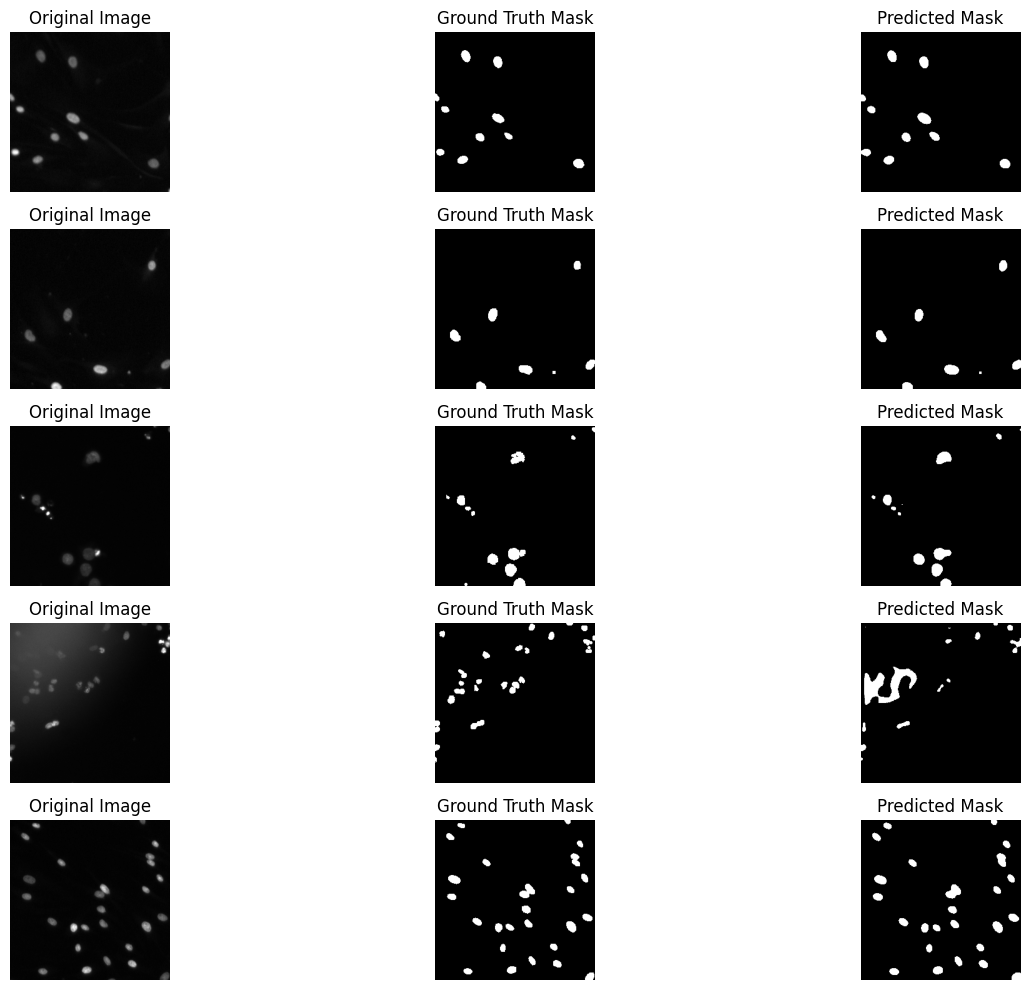

In [4]:
# --- Data Paths ---
DATA_DIR = '/content/drive/MyDrive' # Adjust this to your main dataset directory
TRAIN_IMG_DIR = '/content/drive/MyDrive/NucleiSegmentation/NucleiSegmentationDataset/all_images'
TRAIN_MASK_DIR = '/content/drive/MyDrive/NucleiSegmentation/NucleiSegmentationDataset/merged_masks'

# --- Parameters ---
IMG_WIDTH = 256
IMG_HEIGHT = 256
IMG_CHANNELS = 1 # Assuming grayscale images, change to 3 for RGB
NUM_CLASSES = 1 # Binary segmentation (nuclei vs. background)
BATCH_SIZE = 32
EPOCHS = 20
LEARNING_RATE = 1e-4
VALIDATION_SPLIT = 0.2 # Percentage of training data to use for validation

# --- Helper Functions ---
def load_data(img_dir, mask_dir, img_height, img_width, channels):
    images = []
    masks = []
    img_filenames = sorted(os.listdir(img_dir))
    mask_filenames = sorted(os.listdir(mask_dir))

    for img_file, mask_file in zip(img_filenames, mask_filenames):
        if not img_file.startswith('.') and not mask_file.startswith('.'):
            img_path = os.path.join(img_dir, img_file)
            mask_path = os.path.join(mask_dir, mask_file)

            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE if channels == 1 else cv2.IMREAD_COLOR)
            mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

            if img is not None and mask is not None:
                img = cv2.resize(img, (img_width, img_height))
                mask = cv2.resize(mask, (img_width, img_height), interpolation=cv2.INTER_NEAREST) # Keep binary nature

                img = img / 255.0
                mask = mask / 255.0
                mask = np.expand_dims(mask, axis=-1) # Add channel dimension

                images.append(img)
                masks.append(mask)

    return np.array(images, dtype=np.float32), np.array(masks, dtype=np.float32)

# Load all training data
X, Y = load_data(TRAIN_IMG_DIR, TRAIN_MASK_DIR, IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)

# Split the data into training and validation sets
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=VALIDATION_SPLIT, random_state=42) # You can change the random_state for different splits

print(f"Training images shape: {X_train.shape}")
print(f"Training masks shape: {Y_train.shape}")
print(f"Validation images shape: {X_val.shape}")
print(f"Validation masks shape: {Y_val.shape}")

# --- U-Net Model ---
def unet(input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), num_classes=NUM_CLASSES):
    inputs = Input(shape=input_shape)

    # Contracting Path
    c1 = Conv2D(64, 3, activation='relu', padding='same')(inputs)
    c1 = Conv2D(64, 3, activation='relu', padding='same')(c1)
    p1 = MaxPooling2D(pool_size=(2, 2))(c1)

    c2 = Conv2D(128, 3, activation='relu', padding='same')(p1)
    c2 = Conv2D(128, 3, activation='relu', padding='same')(c2)
    p2 = MaxPooling2D(pool_size=(2, 2))(c2)

    c3 = Conv2D(256, 3, activation='relu', padding='same')(p2)
    c3 = Conv2D(256, 3, activation='relu', padding='same')(c3)
    p3 = MaxPooling2D(pool_size=(2, 2))(c3)

    c4 = Conv2D(512, 3, activation='relu', padding='same')(p3)
    c4 = Conv2D(512, 3, activation='relu', padding='same')(c4)
    p4 = MaxPooling2D(pool_size=(2, 2))(c4)

    c5 = Conv2D(1024, 3, activation='relu', padding='same')(p4)
    c5 = Conv2D(1024, 3, activation='relu', padding='same')(c5)

    # Expanding Path
    u6 = Conv2DTranspose(512, 2, strides=(2, 2), padding='same')(c5)
    u6 = concatenate([u6, c4])
    c6 = Conv2D(512, 3, activation='relu', padding='same')(u6)
    c6 = Conv2D(512, 3, activation='relu', padding='same')(c6)

    u7 = Conv2DTranspose(256, 2, strides=(2, 2), padding='same')(c6)
    u7 = concatenate([u7, c3])
    c7 = Conv2D(256, 3, activation='relu', padding='same')(u7)
    c7 = Conv2D(256, 3, activation='relu', padding='same')(c7)

    u8 = Conv2DTranspose(128, 2, strides=(2, 2), padding='same')(c7)
    u8 = concatenate([u8, c2])
    c8 = Conv2D(128, 3, activation='relu', padding='same')(u8)
    c8 = Conv2D(128, 3, activation='relu', padding='same')(c8)

    u9 = Conv2DTranspose(64, 2, strides=(2, 2), padding='same')(c8)
    u9 = concatenate([u9, c1], axis=3)
    c9 = Conv2D(64, 3, activation='relu', padding='same')(u9)
    c9 = Conv2D(64, 3, activation='relu', padding='same')(c9)

    outputs = Conv2D(num_classes, 1, activation='sigmoid')(c9)

    model = Model(inputs=inputs, outputs=outputs)
    return model

# Instantiate the model
model = unet(input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), num_classes=NUM_CLASSES)

# --- Metrics ---
def iou_metric(y_true, y_pred):
    intersection = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    union = K.sum(K.round(K.clip(y_true, 0, 1))) + K.sum(K.round(K.clip(y_pred, 0, 1))) - intersection
    iou = K.mean((intersection + K.epsilon()) / (union + K.epsilon()))
    return iou

def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + K.epsilon()) / (K.sum(y_true_f) + K.sum(y_pred_f) + K.epsilon())

def precision_metric(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = (true_positives + K.epsilon()) / (predicted_positives + K.epsilon())
    return precision

def recall_metric(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    actual_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = (true_positives + K.epsilon()) / (actual_positives + K.epsilon())
    return recall

def accuracy_metric(y_true, y_pred):
    return K.mean(K.equal(K.round(y_true), K.round(y_pred)))

# Compile the model with added metrics
model.compile(optimizer=Adam(learning_rate=LEARNING_RATE),
              loss='binary_crossentropy',
              metrics=['accuracy', iou_metric, dice_coef, precision_metric, recall_metric, accuracy_metric])

model.summary()

# --- Callbacks ---
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
model_checkpoint = ModelCheckpoint('unet_dsb18.h5', monitor='val_loss', save_best_only=True, verbose=1)

# --- Train the Model ---
history = model.fit(X_train, Y_train,
                    validation_data=(X_val, Y_val),
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    callbacks=[early_stopping, model_checkpoint])

# --- Evaluate the Model ---
print("\n--- Evaluating the Model ---")
loss, accuracy, iou, dice, precision, recall, overall_accuracy = model.evaluate(X_val, Y_val, verbose=1)
print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {accuracy:.4f}")
print(f"Validation IoU: {iou:.4f}")
print(f"Validation Dice Coefficient: {dice:.4f}")
print(f"Validation Precision: {precision:.4f}")
print(f"Validation Recall: {recall:.4f}")
print(f"Validation Overall Accuracy: {overall_accuracy:.4f}")

# --- Visualize Predictions ---
print("\n--- Visualizing Predictions on Validation Set ---")
n_samples = 5
indices = np.random.choice(len(X_val), n_samples, replace=False)

plt.figure(figsize=(15, 10))
for i, index in enumerate(indices):
    img = X_val[index]
    mask = Y_val[index]
    pred_mask = model.predict(np.expand_dims(img, axis=0))[0]
    pred_mask = (pred_mask > 0.5).astype(np.uint8) # Threshold the prediction

    plt.subplot(n_samples, 3, i * 3 + 1)
    plt.imshow(img.squeeze(), cmap='gray')
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(n_samples, 3, i * 3 + 2)
    plt.imshow(mask.squeeze(), cmap='gray')
    plt.title("Ground Truth Mask")
    plt.axis('off')

    plt.subplot(n_samples, 3, i * 3 + 3)
    plt.imshow(pred_mask.squeeze(), cmap='gray')
    plt.title("Predicted Mask")
    plt.axis('off')

plt.tight_layout()
plt.show()

# --- Optional: Save the trained model ---
# model.save('unet_dsb18_trained.h5')
# print("Trained model saved as unet_dsb18_trained.h5")